# Observing the LSB Universe with LSST
# Science Platform Demo - February 6, 2020
## Introduction

LSST data will be available through the **LSST Science Platform** (LSP, but that sounds too much like LSB for this meeting. The Science Platform consists of a few aspects including the

- Portal Aspect
- API Aspect: e.g. data access via IVOA TAP (1.1) Service, supports IVOA ADQL 2.1 queries, query pixels via IVOA SODA service. CAOM2 data model

- **Notebook Aspect**

This demo is a sneak preview of how you’ll interact with the LSST data via the notebook aspect. The only prerequisite is a computer with an internet connection in a modern browser. It can be found at http://nublado.lsst.codes which is running on a google hosted kubernetes cluster. Occasionally, we scale it up to support everyone through a meeting. Authentication would normally be through your github account. Not today. 

Today your best bet for getting access to the Science Platform is joining Stack club. https://github.com/LSSTScienceCollaborations/StackClub You'll get an account at the LSST Data Facility:


1) go to: http://lsst-lsp-stable.ncsa.illinois.edu

 - Select "Science Platform Notebook Aspect"
 - Spawn an container. Choose this week's weekly build `w_2020_04` and a small size.

These notebooks are designed to analyze an image that you will process first with the
LSST stack.  The raw data is available on the LSST Science Platform at
`/project/shared/data/ci_hsc_small`. Users should copy this to their home
directory to work on.

2) Select "New Terminal" at the bottom. (If you can't find this, go to _File_ > _New Launcher_)

`cp -r /project/shared/data/ci_hsc_small ~/ci_hsc_small`

After copying, users will need to run `processCcd.py` at a terminal to process
the raw data into a finished, calibrated exposure and associated source catalog.
You can access a terminal inside the JupyterLab environment.  

3) To setup the terminal environment for running LSST stack commands, run:

```
source /opt/lsst/software/stack/loadLSST.bash
setup lsst_distrib
```
This configures paths and environment variables to select the software you want
to use.

4)  To run the initial LSST processing stages, use the command: 
```
processCcd.py /home/YOUR_USERNAME/ci_hsc_small --rerun lsb_demo_rerun --id visit=903334 ccd=16 --config isr.doWrite=True
```
where `lsb_demo_rerun` is a RERUN_NAME is a name of your choosing; each time you process data, you
should give it a new rerun name.

Now you have an output calibrated image and source catalog to explore. Explore the available notebooks. 

### Notebooks
Notebooks from https://github.com/lsst-sqre/notebook-demo might be found in the notebooks directory. If not:

```
cd notebooks
git clone https://github.com/lsst-sqre/notebook-demo.git
```

We recommend that you start with these notebooks:

- `notebooks/notebook-demo/AAS_2019_tutorial/intro-process-ccd`
 - Intro to LSST stack. Background info for the command you ran above. Also examples of source extraction, measurement, background estimation, and PSF estimation.
-  `notebooks/notebook-demo/AAS_2019_tutorial/Firefly` 
 - Intro to image viewer. Note you can get the url with the display object's `.getClient().get_firefly_url()` method.
- `notebooks/notebook-demo/Firefly` 
 - Intro to image viewer that does not require `processCcd.py` to be run ahead of time. It fetches products on shared disk.
-  `notebooks/notebook-demo/AAS_2019_tutorial/intro-deblending` 
 - Working with catalogs and examples of running detection, deblending, and source measurement.


### Resources
- http://nb.lsst.io
- https://pipelines.lsst.io/getting-started/
  - Tutorial and helpful reference on similar topics we’re covering today. 
- https://pipelines.lsst.io/v/daily/
  - In-progress documentation on all of the Tasks and functions in the Stack
- https://community.lsst.org/
  - Q&A about LSST; someone might have already answered your question here.
- https://github.com/LSSTScienceCollaborations/StackClub/
  - “Stack Club” is a group of science users exploring the LSST Stack. Many helpful
notebooks, all on github.


### Some Background-centric examples

After working through the background re-estimation tutorial in `intro-process-ccd`, we'll go over applying products that will exist from a data release. For consistency, These are the exact images from the talk on Monday:

In [51]:
from lsst.daf.persistence import Butler
butler = Butler('/datasets/hsc/repo/rerun/RC/w_2020_03/DM-23121')

In [52]:
VISIT = 34464
CCD = 81
exposure = butler.get('calexp', visit=VISIT, ccd=CCD)

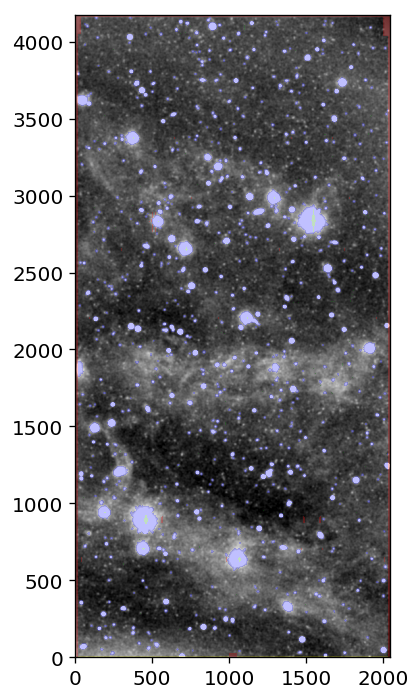

In [53]:
%matplotlib inline
from skimage.filters import gaussian
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import lsst.afw.display as afw_display
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (8, 6)
matplotlib.rcParams["font.size"] = 12
matplotlib.rcParams["figure.dpi"] = 120
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("linear", "zscale")
exposure.image.array[:] = gaussian(exposure.image.array, sigma=5)
display1.mtv(exposure)

Text(0.5, 1.0, 'HSC PDR2 Background')

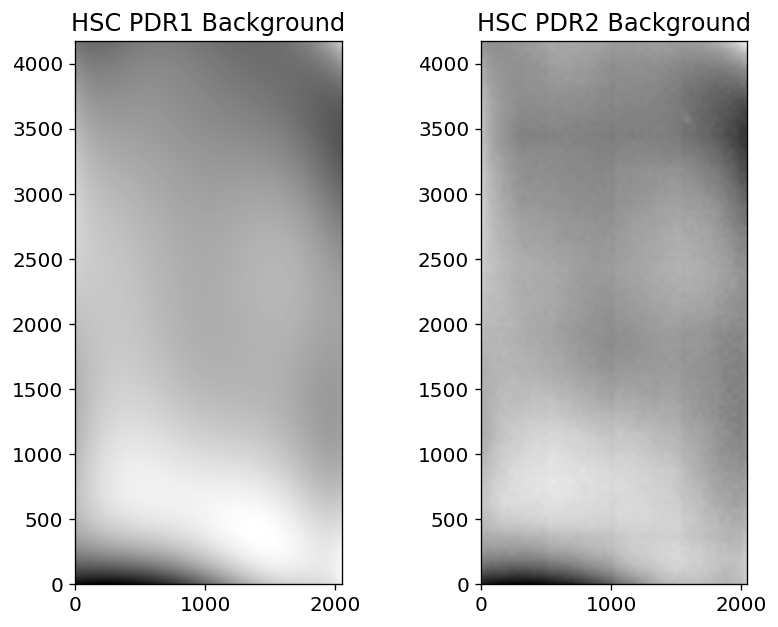

In [54]:
background = butler.get('calexpBackground', visit=VISIT, ccd=CCD)
skyCorr = butler.get('skyCorr', visit=VISIT, ccd=CCD)
plt.subplot(121)
plt.imshow(background.getImage().array, origin='lower', cmap='gray')
plt.title("HSC PDR1 Background")
plt.subplot(122)
plt.imshow(background.getImage().array - skyCorr.getImage().array, origin='lower', cmap='gray')
plt.title("HSC PDR2 Background")

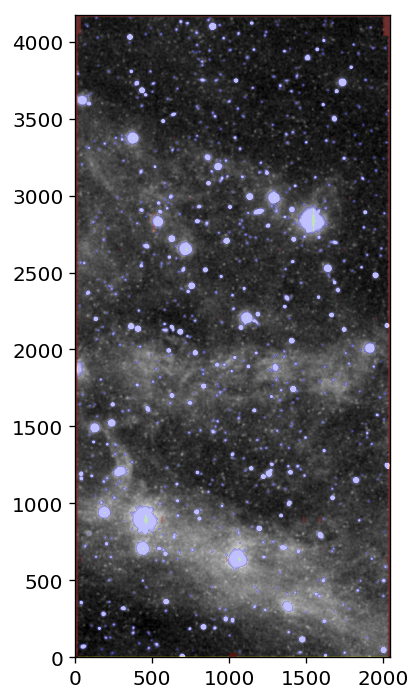

In [55]:
exposure = butler.get('calexp', visit=VISIT, ccd=CCD)
background = butler.get('calexpBackground', visit=VISIT, ccd=CCD)
mi = exposure.maskedImage
mi += background.getImage()
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("linear", "zscale")
exposure.image.array[:] = gaussian(exposure.image.array, sigma=5)
display1.mtv(exposure)

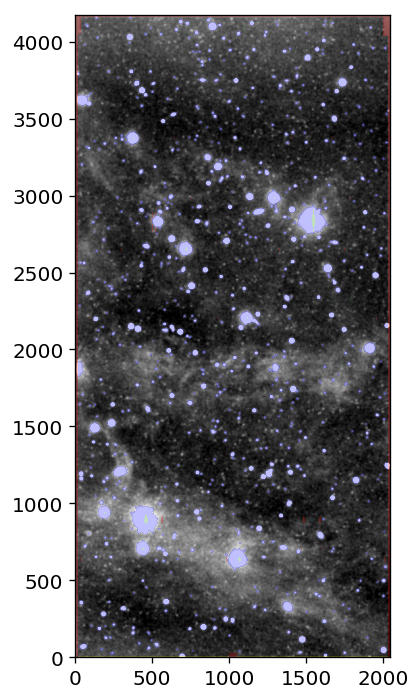

In [56]:
exposure = butler.get('calexp', visit=VISIT, ccd=CCD)
skyCorr = butler.get('skyCorr', visit=VISIT, ccd=CCD)
mi = exposure.maskedImage
mi -= skyCorr.getImage()
display1 = afw_display.Display(frame=1, backend='matplotlib')
display1.scale("linear", "zscale")
exposure.image.array[:] = gaussian(exposure.image.array, sigma=5)
display1.mtv(exposure)

# Footprints

See examples/Firefly.ipynb in this same repo